In [64]:
# import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv("train_titanic.csv") # source: https://www.kaggle.com/c/titanic/data?select=train.csv

# Missing data
## 1. Identify missing data

In [54]:
missing_data = df.isnull()
missing_data.head(5)
# "True" stands for missing value, while "False" stands for not missing value.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [55]:
# Count missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())


PassengerId
False    891
Name: PassengerId, dtype: int64
Survived
False    891
Name: Survived, dtype: int64
Pclass
False    891
Name: Pclass, dtype: int64
Name
False    891
Name: Name, dtype: int64
Sex
False    891
Name: Sex, dtype: int64
Age
False    714
True     177
Name: Age, dtype: int64
SibSp
False    891
Name: SibSp, dtype: int64
Parch
False    891
Name: Parch, dtype: int64
Ticket
False    891
Name: Ticket, dtype: int64
Fare
False    891
Name: Fare, dtype: int64
Cabin
True     687
False    204
Name: Cabin, dtype: int64
Embarked
False    889
True       2
Name: Embarked, dtype: int64


In [56]:
a= np.full(10, -5) # creating an array of 10 filled with -1
b= np.random.uniform(low=20, high=30, size=(50,)) #generating an array of 50 random elements between 20 and 30
age=np.concatenate((a,b)) # concatenating arrays


In [57]:
#Creating a dataframe of age
df1=pd.DataFrame(age, columns=['Age'])
df1.head(15)

,Age
0,-5.000000
1,-5.000000
2,-5.000000
3,-5.000000
4,-5.000000
5,-5.000000
6,-5.000000
7,-5.000000
8,-5.000000
9,-5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8de5a5c2b0>]],
      dtype=object)

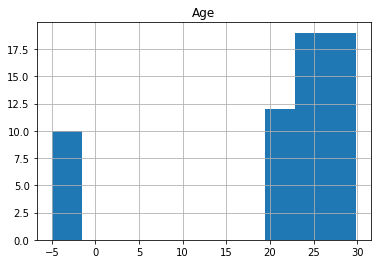

In [58]:
df1.hist()

In [59]:
 df1.replace(-5, np.nan)

,Age
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


## Dealing with missing data

In [60]:
df=df.fillna(df.mean())
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Dummy Variables

In [61]:
dummy_variable_1 = pd.get_dummies(df["Sex"])
dummy_variable_1.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [62]:
df=pd.concat([df,dummy_variable_1],axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0


# Creating new variables
## Binning

Text(0.5, 1.0, 'Age Histogram')

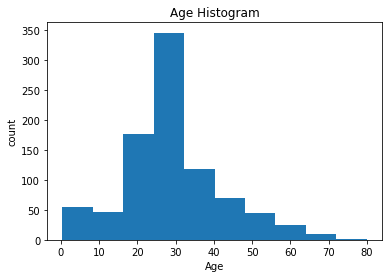

In [73]:
%matplotlib inline

plt.hist(df["Age"])

# set x/y labels and plot title
plt.xlabel("Age")
plt.ylabel("count")
plt.title("Age Histogram")

In [90]:
df['Age_categories'] = '0'
df.loc[(df['Age'] > 0) & (df['Age'] <= 30), 'Age_categories'] = 'Young'
df.loc[(df['Age'] > 30) & (df['Age'] <= 50), 'Age_categories'] = 'Slightly old'
df.loc[(df['Age'] > 50) , 'Age_categories'] = 'Old'


In [94]:

df[['Age','Age_categories']].head()

,Age,Age_categories
0,22.0,Young
1,38.0,Slightly old
2,26.0,Young
3,35.0,Slightly old
4,35.0,Slightly old


Text(0.5, 1.0, 'Age bins')

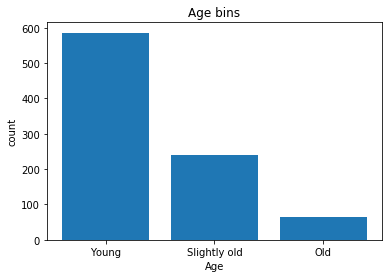

In [92]:
#plotting age according to the new age categories

plt.bar( df["Age_categories"].unique(), df["Age_categories"].value_counts())

# set x/y labels and plot title
plt.xlabel("Age")
plt.ylabel("count")
plt.title("Age bins")

In [93]:
df.groupby("Age_categories").agg("count")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Fare_binned
Age_categories,,,,,,,,,,,,,,,
Old,64,64,64,64,64,64,64,64,64,64,33,63,64,64,64
Slightly old,241,241,241,241,241,241,241,241,241,241,83,240,241,241,241
Young,586,586,586,586,586,586,586,586,586,586,88,586,586,586,586
